# K-Means Clustering tutorial

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# from google.colab import files
# uploaded = files.upload()


Saving fbref_data - Sheet1.csv to fbref_data - Sheet1.csv


Import data

In [3]:
data = pd.read_csv("fbref_data - Sheet1.csv")
data.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD\n▼,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,28,5,5,94,33,61,89,2.34,78.6,32.1,46.5,1.22,"53,249",Erling Haaland - 36,Ederson,→ Champions League via league finish
1,4,Newcastle Utd,38,19,14,5,68,33,35,71,1.87,72.0,39.6,32.4,0.85,"52,127",Callum Wilson - 18,Nick Pope,→ Champions League via league finish
2,2,Arsenal,38,26,6,6,88,43,45,84,2.21,71.9,42.0,29.9,0.79,"60,191","Martin Ødegaard, Gabriel Martinelli - 15",Aaron Ramsdale,→ Champions League via league finish
3,6,Brighton,38,18,8,12,72,53,19,62,1.63,73.3,50.2,23.1,0.61,"31,477",Alexis Mac Allister - 10,Robert Sánchez,→ Europa League via league finish
4,5,Liverpool,38,19,10,9,75,47,28,67,1.76,72.6,50.9,21.7,0.57,"53,163",Mohamed Salah - 19,Alisson,→ Europa League via league finish


Select relevant features


In [4]:
df = data[["Rk", "xG", "xGA"]]
df.head()

,Rk,xG,xGA
0,1,78.6,32.1
1,4,72.0,39.6
2,2,71.9,42.0
3,6,73.3,50.2
4,5,72.6,50.9


Split relevant features into X and y arrays for plotting

In [5]:
X, y = df.iloc[:, 1].values, df.iloc[:, 2].values

Show scatter plot of initial data

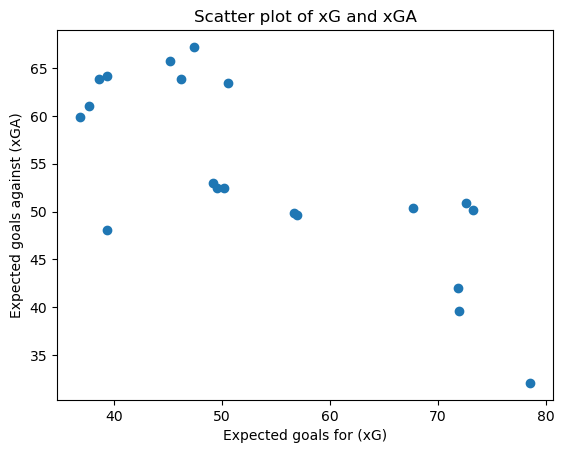

In [6]:
plt.scatter(X, y)

plt.title("Scatter plot of xG and xGA")
plt.xlabel("Expected goals for (xG)")
plt.ylabel("Expected goals against (xGA)")

plt.show()

New variable to pass to KMeans

In [7]:
X = df.iloc[:, 1:].values

Create model

In [8]:
km = KMeans(n_clusters=4, n_init='auto', random_state=0)
km.fit(X)

C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=0)

Plot clusters with centroids

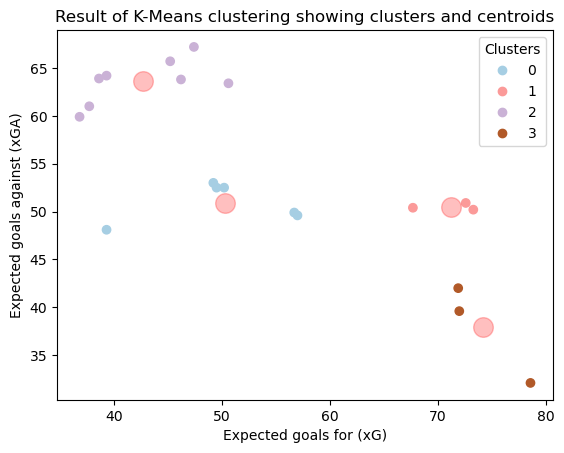

In [9]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='Paired')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, marker='o', c='r', alpha=0.25)

plt.title("Result of K-Means clustering showing clusters and centroids")
plt.xlabel("Expected goals for (xG)")
plt.ylabel("Expected goals against (xGA)")

plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()

Iterate through the algorithm for illustrative purposes

C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Converged by 2 iterations


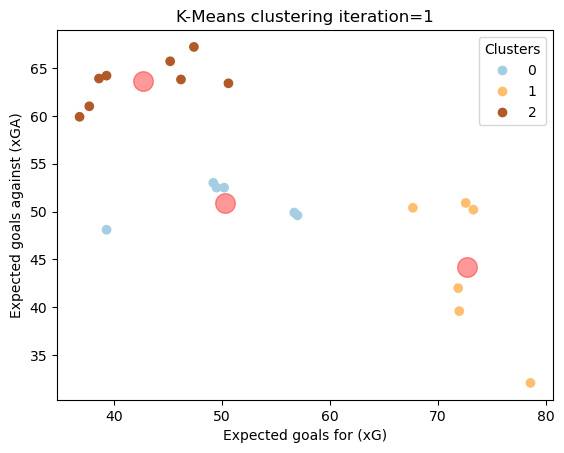

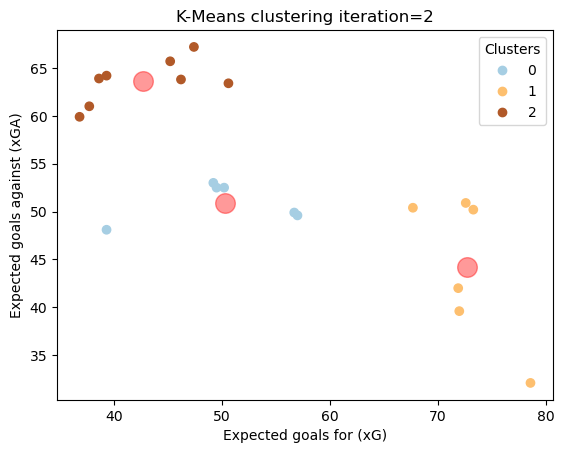

In [10]:
coordinates = {}

for i in range(1,10):
  km = KMeans(n_clusters=3, max_iter=i, random_state=0, n_init='auto')
  km.fit(X)

  if i > km.n_iter_:
    print(f"Converged by {km.n_iter_} iterations")
    break

  coordinates[i] = km.cluster_centers_

  plt.figure()
  scatter = plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='Paired')
  plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, marker='o', c='r', alpha=0.4)
  plt.title(f"K-Means clustering iteration={km.n_iter_}")
  plt.xlabel("Expected goals for (xG)")
  plt.ylabel("Expected goals against (xGA)")

  plt.legend(*scatter.legend_elements(), title="Clusters")

In [11]:
# Show coordinates of centroids through iterations
coordinates

{1: array([[50.31666667, 50.93333333],
        [72.68333333, 44.2       ],
        [42.725     , 63.6375    ]]),
 2: array([[50.31666667, 50.93333333],
        [72.68333333, 44.2       ],
        [42.725     , 63.6375    ]])}

How to pick K? How do we evaluate our model?

In [12]:
# Within cluster sum of squares (WCSS)
WCSS = []

for i in range(1,8):
  km = KMeans(n_clusters=i, random_state=0, n_init='auto')
  km.fit(X)
  WCSS.append(km.inertia_)

C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [13]:
WCSS

[5379.8475,
 1562.2811904761907,
 811.3237500000001,
 559.9820833333334,
 373.45583333333326,
 293.5141666666667,
 138.24049999999994]

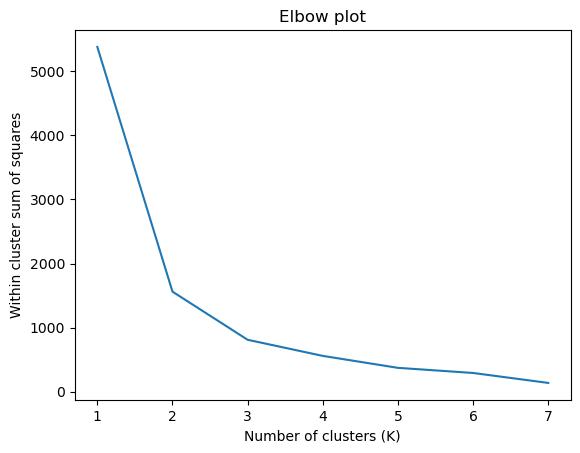

In [17]:
plt.plot(range(1,8), WCSS)
plt.title("Elbow plot")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Within cluster sum of squares")

plt.show()

Therefore, 3 clusters seems to be optimum for our data.

Show the average "Rank" i.e. finishing position of teams in each cluster.
We see that teams with high xG for and low xGA (cluster 1) have a high finishing position. This metric seems useful for predicting team performance.

In [18]:
# Labels given to clusters
km.labels_

array([5, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 6, 2, 2, 2, 2, 4, 4, 4, 4])

In [19]:
cluster_1 = df[0:6]
cluster_0 = df[6:12]
cluster_2 = df[12:]

print("Cluster '1':", cluster_1["Rk"].values)
print("Cluster '0':", cluster_0["Rk"].values)
print("Cluster '2':", cluster_2["Rk"].values)

Cluster '1': [1 4 2 6 5 3]
Cluster '0': [ 8  9  7 12 14 11]
Cluster '2': [18 10 19 17 13 20 16 15]
